In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import snowflake.connector
import csv

In [3]:
def read_file(file):
    data = dict((('Date',[]),
              ('open',[]),
              ('high',[]),
              ('low',[]),
              ('close',[]),
              ('adj_close',[]),
              ('volume',[])
             ))
    with open(file) as csvfile:
        csv_reader = csv.reader(csvfile,delimiter=',')
        next(csv_reader)
        for row in csv_reader:
            data['Date'].append(row[0])
            data['open'].append(float(row[1]))
            data['high'].append(float(row[2]))
            data['low'].append(float(row[3]))
            data['close'].append(float(row[4]))
            data['adj_close'].append(float(row[5]))
            data['volume'].append(float(row[6]))
    return pd.DataFrame(data)

## Extraer registros desde la fuente ...

In [5]:
tesla = read_file('TSLA.csv')

In [6]:
tesla.head()

,Date,open,high,low,close,adj_close,volume
0,2020-02-24,167.800003,172.699997,164.440002,166.757996,166.757996,75961000.0
1,2020-02-25,169.800003,171.320007,157.399994,159.981995,159.981995,86452500.0
2,2020-02-26,156.500000,162.662003,155.222000,155.759995,155.759995,70427500.0
3,2020-02-27,146.000000,147.953995,133.800003,135.800003,135.800003,121386000.0
4,2020-02-28,125.940002,138.104004,122.304001,133.598007,133.598007,122821000.0


In [7]:
aapl = read_file('AAPL.csv')

In [8]:
aapl.head()

,Date,open,high,low,close,adj_close,volume
0,2020-02-24,74.315002,76.044998,72.307503,74.544998,73.971603,222195200.0
1,2020-02-25,75.237503,75.632500,71.532501,72.019997,71.466019,230673600.0
2,2020-02-26,71.632500,74.470001,71.625000,73.162498,72.599739,198054800.0
3,2020-02-27,70.275002,71.500000,68.239998,68.379997,67.854019,320605600.0
4,2020-02-28,64.315002,69.602501,64.092499,68.339996,67.814331,426884800.0


In [9]:
msft = read_file('MSFT.csv')

In [10]:
msft.head()

,Date,open,high,low,close,adj_close,volume
0,2020-02-24,167.770004,174.550003,163.229996,170.889999,169.170883,68311100.0
1,2020-02-25,174.199997,174.839996,167.649994,168.070007,166.379257,68073300.0
2,2020-02-26,169.710007,173.259995,168.210007,170.169998,168.458115,56206100.0
3,2020-02-27,163.320007,167.029999,157.979996,158.179993,156.588730,93174900.0
4,2020-02-28,152.410004,163.710007,152.000000,162.009995,160.380188,97073600.0


### Se crea una columna para diferenciar el simbolo o el mercado bajo estudio...

In [11]:
tesla['simbolo']= 'tesla'
aapl['simbolo'] = 'aapl'
msft['simbolo'] = 'msft'

## Transformacion de los Datos para normalizarlos y poderlos comparar..

In [12]:
tesla['adj_close'] = tesla['adj_close']/tesla.loc[0,'adj_close']

aapl['adj_close'] = aapl['adj_close']/aapl.loc[0,'adj_close']

msft['adj_close'] = msft['adj_close']/msft.loc[0,'adj_close']

In [13]:
tesla['volume'] = tesla['volume']/tesla.loc[0,'volume']

aapl['volume'] = aapl['volume']/aapl.loc[0,'volume']

msft['volume'] = msft['volume']/msft.loc[0,'volume']

In [14]:
datamart = pd.concat([tesla,aapl,msft])

In [15]:
datamart.head()

,Date,open,high,low,close,adj_close,volume,simbolo
0,2020-02-24,167.800003,172.699997,164.440002,166.757996,1.000000,1.000000,tesla
1,2020-02-25,169.800003,171.320007,157.399994,159.981995,0.959366,1.138117,tesla
2,2020-02-26,156.500000,162.662003,155.222000,155.759995,0.934048,0.927153,tesla
3,2020-02-27,146.000000,147.953995,133.800003,135.800003,0.814354,1.598004,tesla
4,2020-02-28,125.940002,138.104004,122.304001,133.598007,0.801149,1.616896,tesla


## Coneccion a Snowflake para crear el DW ...

In [16]:
cnn = snowflake.connector.connect(
    user = 'EDUJIMENEZ64',
    password = 'Salva.1208',
    account = 'jo45461.us-central1.gcp'
)

cs = cnn.cursor()

In [17]:
cs.execute('Select current_version()')
row = cs.fetchone()
print(row[0])

5.37.2


In [18]:
sql = "CREATE WAREHOUSE IF NOT EXISTS project_warehouse"
cs.execute(sql)
print('Warehouse created')

Warehouse created


In [19]:
sql = "CREATE DATABASE IF NOT EXISTS project_database"
cs.execute(sql)
print('Database created')

Database created


In [20]:
sql = "USE DATABASE project_database"
cs.execute(sql)
print('connecto to database')

connecto to database


In [21]:
sql = "CREATE SCHEMA IF NOT EXISTS project_schema"
cs.execute(sql)
print('create schema')

create schema


In [22]:
sql = "USE WAREHOUSE project_warehouse"
cs.execute(sql)
print('use warehouse')

use warehouse


In [23]:
sql = "USE DATABASE project_database"
cs.execute(sql)
print('connecto to database')

connecto to database


In [24]:
sql = "USE SCHEMA project_schema"
cs.execute(sql)
print('connecto to schema')

connecto to schema


In [25]:
sql = ("CREATE OR REPLACE TABLE project_stock"
        "(FECHA DATE, SIMBOLO TEXT(5), OPEN DEC(20,10), HIGH DEC(20,10), LOW DEC(20,10), CLOSE DEC(20,10), ADJ_CLOSE DEC(20,10), VOLUME DEC(20,10) )")
cs.execute(sql)
print('create project_stock table')

create project_stock table


In [26]:
datamart.reset_index(inplace=True)

# Carga de registros al DW de Snowflake ...

In [27]:
for id in datamart.index:
    date = datamart.loc[id,'Date']
    simbolo = datamart.loc[id,'simbolo']
    open_ = datamart.loc[id,'open']
    high = datamart.loc[id,'high']
    low = datamart.loc[id,'low']
    close = datamart.loc[id,'close']
    adj_close = datamart.loc[id,'adj_close']
    volume = datamart.loc[id,'volume']
    valor = f"VALUES ('{date}','{simbolo}',{open_},{high},{low},{close},{adj_close},{volume})"
    sql = ("INSERT INTO project_stock (FECHA, SIMBOLO, OPEN, HIGH, LOW, CLOSE, ADJ_CLOSE, VOLUME)"
           f"{valor}")
    cs.execute(sql)

In [28]:
sql = "SELECT count(*) FROM project_stock"
cs.execute(sql)

In [ ]:
sql = "SELECT simbolo, fecha, adj_close, volume FROM project_stock"
cs.execute(sql)

In [46]:
sql = "SELECT simbolo, adj_close, volume FROM project_stock"
cs.execute(sql)

In [47]:
adj_close = {'tesla':[],'aapl':[],'msft':[]}
volume = {'tesla':[],'aapl':[],'msft':[]}

for row in cs.fetchall():
    adj_close[row[0]].append(row[1])
    volume[row[0]].append(row[2])

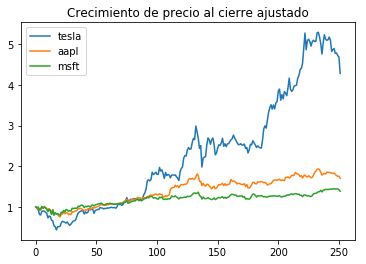

In [52]:
pd.DataFrame(adj_close).astype('float').plot(title='Crecimiento de precio al cierre ajustado')

1- Se observa claramente que las acciones de tesla han mostrado un crecimiento muchisimo mayor que las dos anteriores
2- La acciones de Microsoft muestra una tendencia mas estable en el tiempo

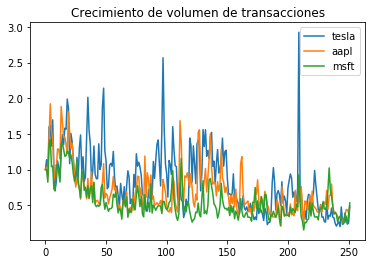

In [53]:
pd.DataFrame(volume).astype('float').plot(title='Crecimiento de volumen de transacciones')

3- El volumen de transaciones de las acciones tiende a reducirse, se aprecian unos picos en especial en las acciones de tesla

In [ ]:
cs.close()

In [ ]:
cnn.close()